In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
from sklearn.datasets import make_classification

In [3]:
from sklearn.model_selection import train_test_split
X,y = make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [4]:
X.shape

(2000, 20)

In [6]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### 1. Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_train_pred = rf_model.predict_proba(X_train)
print("RF train ROC_AUC:{}".format(roc_auc_score(y_train, y_train_pred[:,1])))
y_test_pred =rf_model.predict_proba(X_test)
print("RF model test ROC_AUC:{}".format(roc_auc_score(y_test,y_test_pred[:,1])))

RF train ROC_AUC:0.9999530603623332
RF model test ROC_AUC:0.9789833333333333


C:\Users\Venkata Kiran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 2. Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train,y_train)
y_train_pred = log_classifier.predict_proba(X_train)
print("Logistic train ROC_AUC:{}".format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = log_classifier.predict_proba(X_test)
print("Logictic test ROC_AUC:{}".format(roc_auc_score(y_test,y_test_pred[:,1])))

Logistic train ROC_AUC:0.9863589331232614
Logictic test ROC_AUC:0.9885777777777777


C:\Users\Venkata Kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 3. Adaboost Classifier

In [13]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


### 4. KNN Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
y_train_pred = knn_classifier.predict_proba(X_train)
print("KNN train ROC_AUC:{}".format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = knn_classifier.predict_proba(X_test)
print("KNN test ROC_AUC:{}".format(roc_auc_score(y_test,y_test_pred[:,1])))

KNN train ROC_AUC:0.981670071491109
KNN test ROC_AUC:0.9426111111111111


### Now we will focus on selecting the best threshold for maximum accuracy


In [22]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9848777777777779


In [23]:
pd.concat(pred,axis=1)


,0,1,2,3
0,1.0,0.991869,0.559186,1.0
1,0.0,0.000008,0.463282,0.0
2,0.9,0.966761,0.538202,0.8
3,0.9,0.761461,0.509875,0.8
4,0.3,0.777991,0.490344,0.4
5,0.3,0.542391,0.492548,0.6
6,0.9,0.977743,0.537171,1.0
7,1.0,0.960890,0.552570,0.8
8,1.0,0.993595,0.537610,1.0
9,0.8,0.504627,0.510507,0.6


In [24]:
final_prediction


0      0.887764
1      0.115823
2      0.801241
3      0.742834
4      0.492084
5      0.483735
6      0.853729
7      0.828365
8      0.882801
9      0.603783
10     0.668781
11     0.683892
12     0.190969
13     0.806190
14     0.867532
15     0.193013
16     0.165066
17     0.117459
18     0.113089
19     0.118169
20     0.869313
21     0.493702
22     0.722287
23     0.810303
24     0.117427
25     0.831242
26     0.119011
27     0.732959
28     0.739795
29     0.390164
         ...   
570    0.887340
571    0.121033
572    0.765509
573    0.321021
574    0.110464
575    0.781376
576    0.234066
577    0.140598
578    0.390040
579    0.114125
580    0.547625
581    0.193555
582    0.171253
583    0.140189
584    0.387759
585    0.839165
586    0.164580
587    0.883504
588    0.114644
589    0.254715
590    0.583641
591    0.191727
592    0.111017
593    0.216040
594    0.116964
595    0.121304
596    0.110345
597    0.879195
598    0.160715
599    0.837361
Length: 600, dtype: floa

In [25]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91373217, 0.91373217, 0.91156638, 0.91077267, 0.80618993,
       0.805555  , 0.79701186, 0.79320261, 0.7909021 , 0.78782624,
       0.73875837, 0.73849235, 0.67085994, 0.6687815 , 0.65256224,
       0.65218131, 0.64289021, 0.63380786, 0.60378347, 0.58201661,
       0.55323121, 0.54762509, 0.53473191, 0.51722851, 0.50375922,
       0.49370183, 0.4690538 , 0.40464882, 0.39646096, 0.3848282 ,
       0.38342204, 0.34286464, 0.33553337, 0.27287525, 0.27112022,
       0.24660309, 0.24315777, 0.19172692, 0.19096876, 0.11794908,
       0.11783509, 0.10498954])

In [27]:
tpr

array([0.        , 0.00333333, 0.02333333, 0.02333333, 0.60333333,
       0.60333333, 0.64333333, 0.64333333, 0.65      , 0.65      ,
       0.80333333, 0.80333333, 0.89      , 0.89      , 0.89666667,
       0.89666667, 0.91333333, 0.91333333, 0.92666667, 0.92666667,
       0.95666667, 0.95666667, 0.96      , 0.96      , 0.96333333,
       0.96333333, 0.97666667, 0.97666667, 0.98      , 0.98      ,
       0.98333333, 0.98333333, 0.98666667, 0.98666667, 0.99      ,
       0.99      , 0.99333333, 0.99333333, 0.99666667, 0.99666667,
       1.        , 1.        ])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_ = []
for thr in thresholds:
    y_pred = np.where(final_prediction>thr,1,0)
    accuracy_.append(accuracy_score(y_test,y_pred,normalize = True))
accuracy_ = pd.concat([pd.Series(thresholds), pd.Series(accuracy_)], axis=1)
accuracy_.columns = ["Thresholds","Accuracy"]
accuracy_.sort_values(by="Accuracy",ascending=False,inplace=True)
accuracy_.head()

,Thresholds,Accuracy
21,0.547625,0.960000
26,0.469054,0.960000
22,0.534732,0.958333
20,0.553231,0.958333
27,0.404649,0.956667


In [34]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

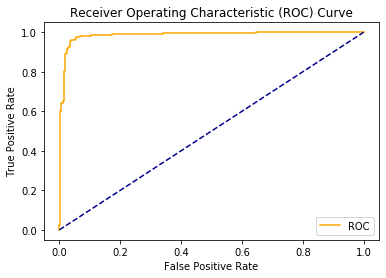

In [35]:
plot_roc_curve(fpr,tpr)
